In [3]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



# Load the Titanic dataset

df = sns.load_dataset('titanic')



# Preview the first few rows

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Dataset overview

print("Shape of the dataset:", titanic_data.shape)

print("\nColumns in the dataset:\n", titanic_data.columns)



# Check for missing values

print("\nMissing values in each column:\n", titanic_data.isnull().sum())



# Data types and summary statistics

print("\nData types:\n", titanic_data.dtypes)

print("\nSummary Statistics:\n", titanic_data.describe(include='all'))

Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:
           su

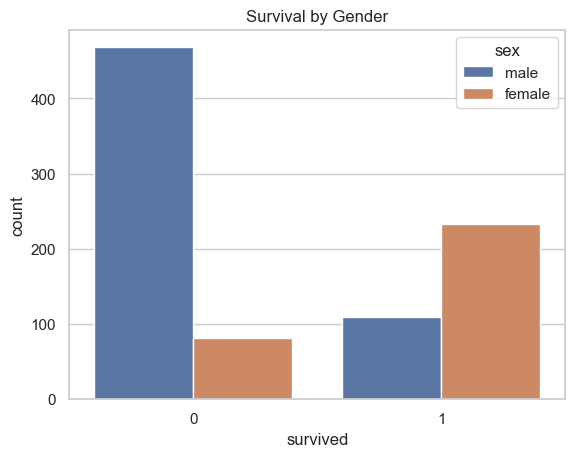

In [4]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_child'] = df['age'] < 16
df['fare_bin'] = pd.qcut(df['fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])

sns.set(style="whitegrid")

sns.countplot(x='survived', hue='sex', data=df)
plt.title("Survival by Gender")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

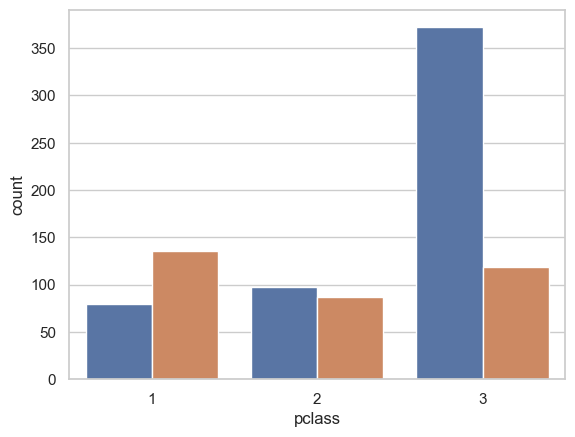

In [5]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Pclass")
plt.show()

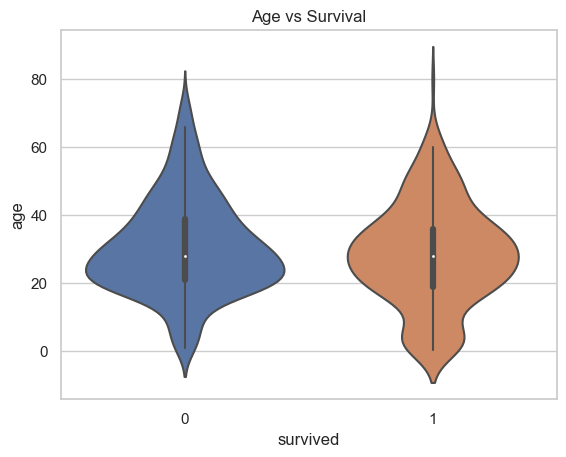

In [6]:

sns.violinplot(x='survived', y='age', data=df)
plt.title("Age vs Survival")
plt.show()

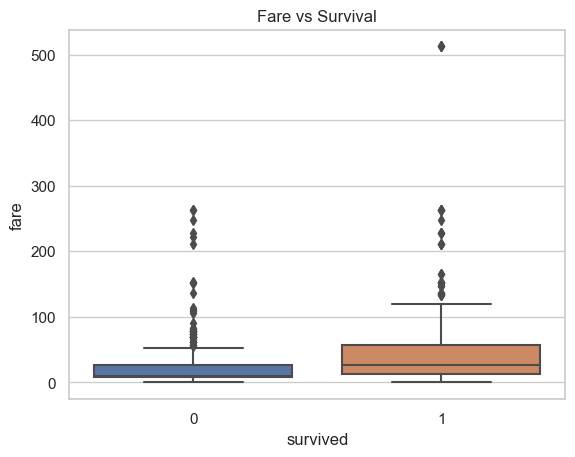

In [7]:
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Fare vs Survival")
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

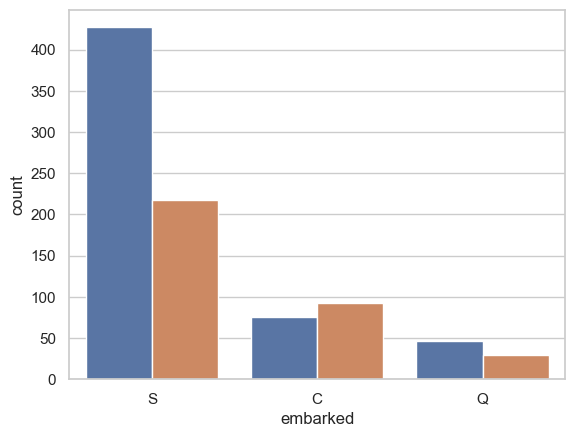

In [8]:
sns.countplot(x='embarked', hue='survived', data=df)
plt.title("Survival by Embarked Port")
plt.show()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

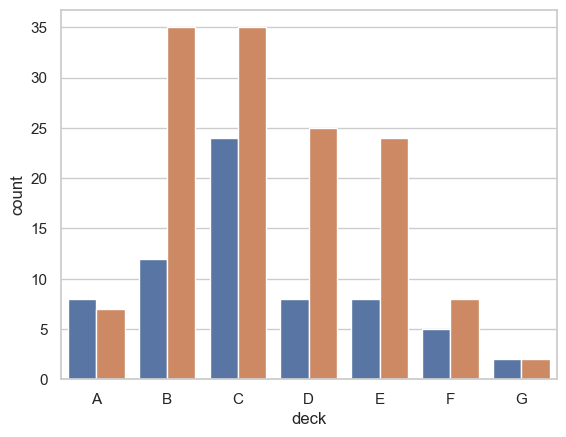

In [9]:
sns.countplot(x='deck', hue='survived', data=df)
plt.title("Survival by Deck")
plt.show()

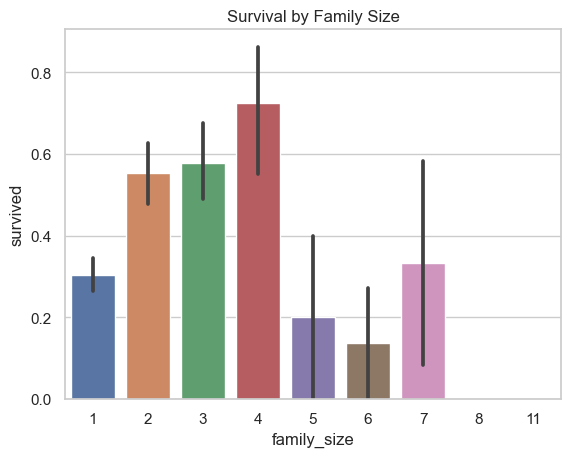

In [10]:
sns.barplot(x='family_size', y='survived', data=df)
plt.title("Survival by Family Size")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

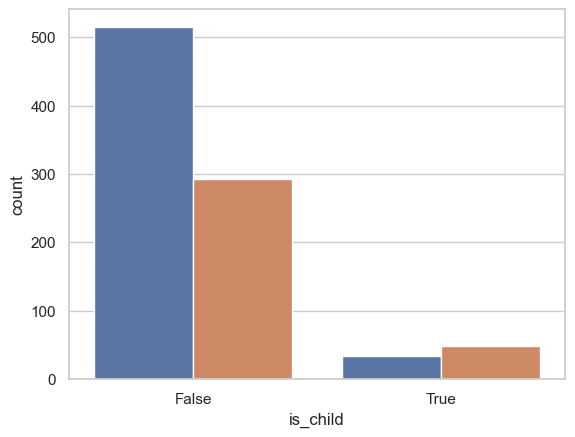

In [11]:
sns.countplot(x='is_child', hue='survived', data=df)
plt.title("Survival: Child vs Adult")
plt.show()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

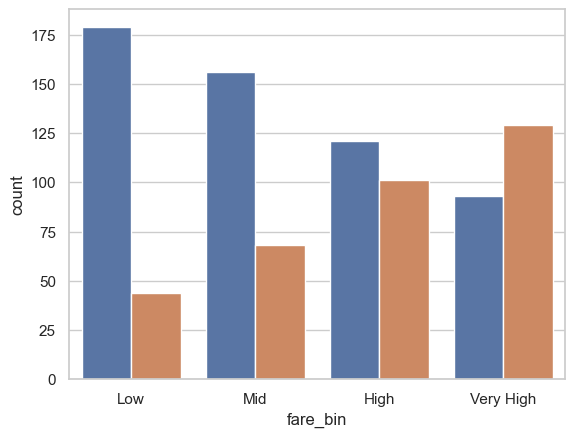

In [12]:

sns.countplot(x='fare_bin', hue='survived', data=df)
plt.title("Survival by Fare Category")
plt.show()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

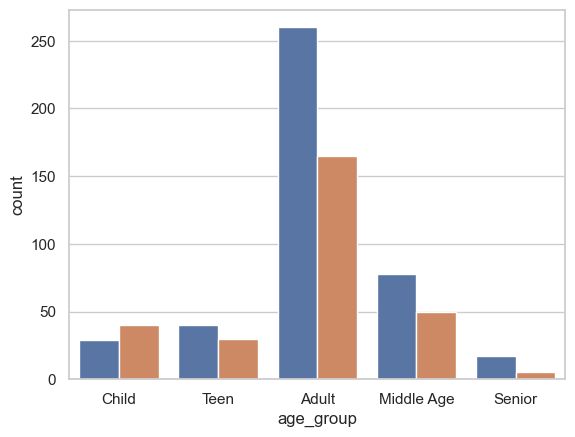

In [13]:
sns.countplot(x='age_group', hue='survived', data=df)
plt.title("Survival by Age Group")
plt.show()


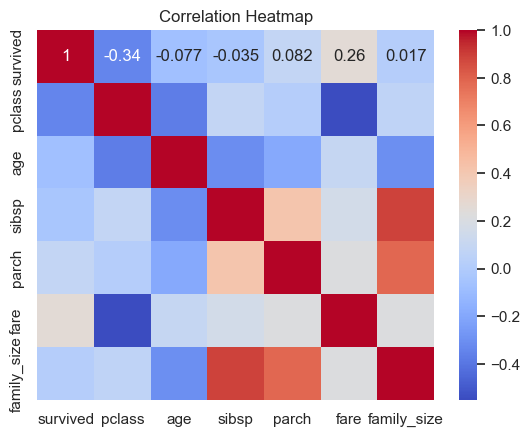

In [14]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [15]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': (missing / len(df)) * 100})
print(missing_df)

             Missing Count  Missing %
deck                   688  77.216611
age_group              177  19.865320
age                    177  19.865320
embarked                 2   0.224467
embark_town              2   0.224467
fare_bin                 0   0.000000
is_child                 0   0.000000
family_size              0   0.000000
alone                    0   0.000000
alive                    0   0.000000
survived                 0   0.000000
adult_male               0   0.000000
pclass                   0   0.000000
class                    0   0.000000
fare                     0   0.000000
parch                    0   0.000000
sibsp                    0   0.000000
sex                      0   0.000000
who                      0   0.000000
